In [8]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import optimize 
from scipy.special import erf
BOLD = '\033[1m'

In [9]:
# Input
M = 2
W = 10  
ath = 0.01
atv = 0.001
Ca = 8
Cd = 5 
Ct = 0.0
ga = 3.5

In [10]:
#Main code

def f_lm(x): # Liedl 2011- f(x) = 0
    return erf(W/(np.sqrt(4*ath*x)))*np.exp(-atv*x*(np.pi/(2*M))**2)-(np.pi/4)*((ga*Ct+Ca)/(ga*Cd + Ca)) 

def df_lm(x): # FD estimate df
    h = 1e-4
    return (f_lm(x+h) - f_lm(x-h))/(2*h)

def df_lm1(x): # exact df
    return -W/(2*x*np.sqrt(np.pi)*np.sqrt(atv*x))*np.exp(-(W**2)/(4*atv*x))*np.exp(-(np.pi**2*atv*x)/(4*M**2)) \
        - (1/(4*M**2))*np.pi**2*atv*np.exp((-np.pi**2*atv*x)/(4*M**2))*erf(W/(2*np.sqrt(atv*x)))  

def NR(x): # Newton Raphson simulation using FD
    iterat = 0
    tol = 1e-06
    h = f_lm(x)/df_lm(x)
    print("Iter. Nr ","", "Lmax","       " , " Residual")
    print('-'*35)   
    
    while abs(h)>= tol:
        h = f_lm(x)/df_lm(x) 
        x = x - h
        iterat+= 1 
        print(" ",iterat,  "    " , "%.4f "% x, "   " , "%.2e " %  h) 
        
def NR1(x): # Newton Raphson simulation using exact df
    iterat = 0
    tol = 1e-06
    h = f_lm(x)/df_lm1(x)
    print("Iter. Nr ","", "Lmax","       " , " Residual")
    print('-'*35)  
    
    while abs(h)>= tol:
        h = f_lm(x)/df_lm1(x) 
        x = x - h
        iterat+= 1
        print(" ",iterat,  "    " , "%.4f "% x, "   " , "%.2e " %  h)

print("{}The main functions".format(BOLD))

The main functions


The f(x) = 0 plot


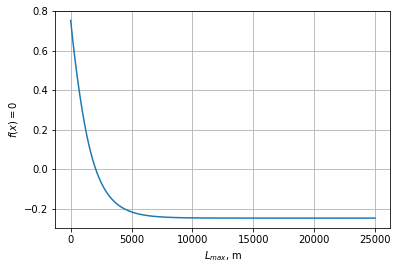

In [11]:
#f(x) = 0 Plot
print("{}The f(x) = 0 plot".format(BOLD))
x = np.linspace(1,25000, 25000)
y = f_lm(x)
plt.plot(x,y) 
plt.grid() 
plt.xlabel(r"$L_{max}$, m");
plt.ylabel(r"$f(x) = 0$");

In [12]:
print("{}".format(BOLD))
ma_1 = -1/(np.pi*(ath/W**2)*np.log(1-(0.25*np.pi*((ga*Ct+Ca)/(ga*Cd+Ca)))))
ma_2 = -2/(np.pi**2*(atv/M**2))*np.log(0.25*np.pi*((ga*Ct+Ca)/(ga*Cd+Ca))) 
ma_3 = 4/np.pi**2*(M**2/atv)*np.log((4/np.pi)*((ga*Cd+ Ca)/(ga*Ct+ Ca)))

ma_x0 = np.minimum(np.maximum(ma_1, ma_2), ma_3)

min_x0 = np.minimum(-1/(np.pi*(ath/W**2) *np.log(1-(0.25*np.pi*((ga*Ct+Ca)/(ga*Cd+Ca))))), \
                    -2/(np.pi**2*(atv/M**2))*np.log(0.25*np.pi*((ga*Ct+Ca)/(ga*Cd+Ca))))

if ma_x0 == ma_3:
    print("The initial value is", ma_x0)
    x0 = ma_x0
else:
    print("The initial value is", min_x0)
    x0 = ma_x0


The initial value is 2270.8936712404343


In [13]:
BOLD = '\033[1m'

print("{}Result with estimated differntial".format(BOLD)) 
NR1(x0) # simulations using exact differential
print()

print("Result with exact differntial")
NR(x0)   # simulations using approximated differential 
print()

print("Result with Scipy code using SECANT method")
secant= optimize.newton(f_lm, x0)  # simulation using secant method
print(secant) 

Result with estimated differntial
Iter. Nr   Lmax          Residual
-----------------------------------
  1      2047.4211      2.23e+02 
  2      2064.6887      -1.73e+01 
  3      2064.3211      3.68e-01 
  4      2064.3305      -9.44e-03 
  5      2064.3303      2.42e-04 
  6      2064.3303      -6.19e-06 
  7      2064.3303      1.58e-07 

Result with exact differntial
Iter. Nr   Lmax          Residual
-----------------------------------
  1      2048.0166      2.23e+02 
  2      2064.2344      -1.62e+01 
  3      2064.3303      -9.59e-02 
  4      2064.3303      -3.33e-06 
  5      2064.3303      1.57e-13 

Result with Scipy code using SECANT method
2064.330297981322


In [30]:
1

1